# 1. Collection

In [5917]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5918]:
with open("/Users/diegobeteta/Library/Mobile Documents/com~apple~CloudDocs/scrapy/usedcranes/usedcranes.json") as f:
    data = json.load(f)

In [5919]:
df = pd.DataFrame(columns=[ 'category',
                            'brand',
                            'model',
                            'capacity_ust',
                            'serial_number',
                            'year',
                            'hours',
                            'price',
                            'condition',
                            'location',
                            'description',
                            'link'])

# convert JSON to CSV
for i in range(0, len(data)):
    currentItem = data[i]
    df.loc[i] = [data[i]['Category'],
                 data[i]['Manufacturer'],
                 data[i]['Model'],
                 data[i]['Ton (USt)'],
                 data[i]['Serial Number'],
                 data[i]['Year'], 
                 data[i]['Hours'],
                 data[i]['price'],
                 data[i]['Condition'],
                 data[i]['location'],
                 data[i]['description'],
                 data[i]['link']]
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,location,description,link
0,\nRough Terrain Cranes,\nTerex,\nRT 100US,100.00,None,\n2020,\n54,"$599,000 USD",\nNew,"Location: Gary, IN, USA",New 2020 Terex RT100|39' - 154' Main Boom|\nSw...,https://cranemarket.com/new-2020-terex-rt-100-...
1,\nRough Terrain Cranes,\nGrove,\nRT530E-2,30.00,\n226299,\n2007,"\n4,578 as of 12/09/22",Price On Request,\nVery Good,"Location: 500 World Commerce Pkwy, St. Augusti...",S/N: 226299 EQUIPPED WITH 29'-95'4-SECTION BOO...,https://cranemarket.com/grove-rt530e-30-ton-ro...
2,\nRough Terrain Cranes,\nGrove,\nGRT8100,100.00,\n235616,\n2016,"\n4,535",Price On Request,\nVery Good,Location: 500 World Commerce Pkwy St. Augustin...,ONE 2016 GROVE GRT8100 SN 235616 ROUGH TERRAIN...,https://cranemarket.com/grove-grt8100-100-ton-...
3,\nRough Terrain Cranes,\nTadano,\nGR-750XL,75.00,None,\n2013,"\n7,927",Price On Request,\nUsed,"Location: Cropac Equipment Inc, South Service ...",75 US ton capacity|36.1’ - 141.1’ five-section...,https://cranemarket.com/2013-tadano-gr-750xl-7...
4,\nRough Terrain Cranes,\nTadano,\nGR-550XL-3,None,None,\n2017,None,"$400,000 USD",\nUsed,"Location: San Leandro, CA",,https://cranemarket.com/tadano-gr-550xl-3-for-...
...,...,...,...,...,...,...,...,...,...,...,...,...
926,\nRough Terrain Cranes,\nGrove,\nRT522,22.00,\n66193,\n1983,\n2672,"$29,900 USD",\nAs Is,"Location: Sparrow Bush, NY, United States",Detroit 4-53 4 cylinder natural diesel mech |T...,https://cranemarket.com/grove-rt522-22-ton-rou...
927,\nRough Terrain Cranes,\nGrove,\nRT58,14.00,\n30987,\n1975,\n4045,"$18,900 USD",\nGood,"Location: Sparrow Bush, NY, United States",Transmission: 3 speed automatic |Tires: 17.5-2...,https://cranemarket.com/grove-rt58-14-ton-down...
928,\nRough Terrain Cranes,\nGrove,\nRT755,55.00,None,\n1975,None,"$90,000 USD",\nUsed,Location: Mexico,"34' - 116’ 4-Section Full-Power Boom,|No Jib,|...",https://cranemarket.com/1975-grove-rt755-55-to...
929,\nRough Terrain Cranes,\nGrove,\nRT58,14.00,\n19980,\n1972,\n2511,"$18,900 USD",\nGood,"Location: Sparrow Bush, NY, United States",Transmission 3-speed automatic |Tires: 17.5-25...,https://cranemarket.com/grove-rt58-14-ton-down...


In [5920]:
# Get data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 930
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       931 non-null    object
 1   brand          931 non-null    object
 2   model          931 non-null    object
 3   capacity_ust   870 non-null    object
 4   serial_number  549 non-null    object
 5   year           915 non-null    object
 6   hours          533 non-null    object
 7   price          931 non-null    object
 8   condition      931 non-null    object
 9   location       931 non-null    object
 10  description    931 non-null    object
 11  link           931 non-null    object
dtypes: object(12)
memory usage: 94.6+ KB


# 2. Cleaning

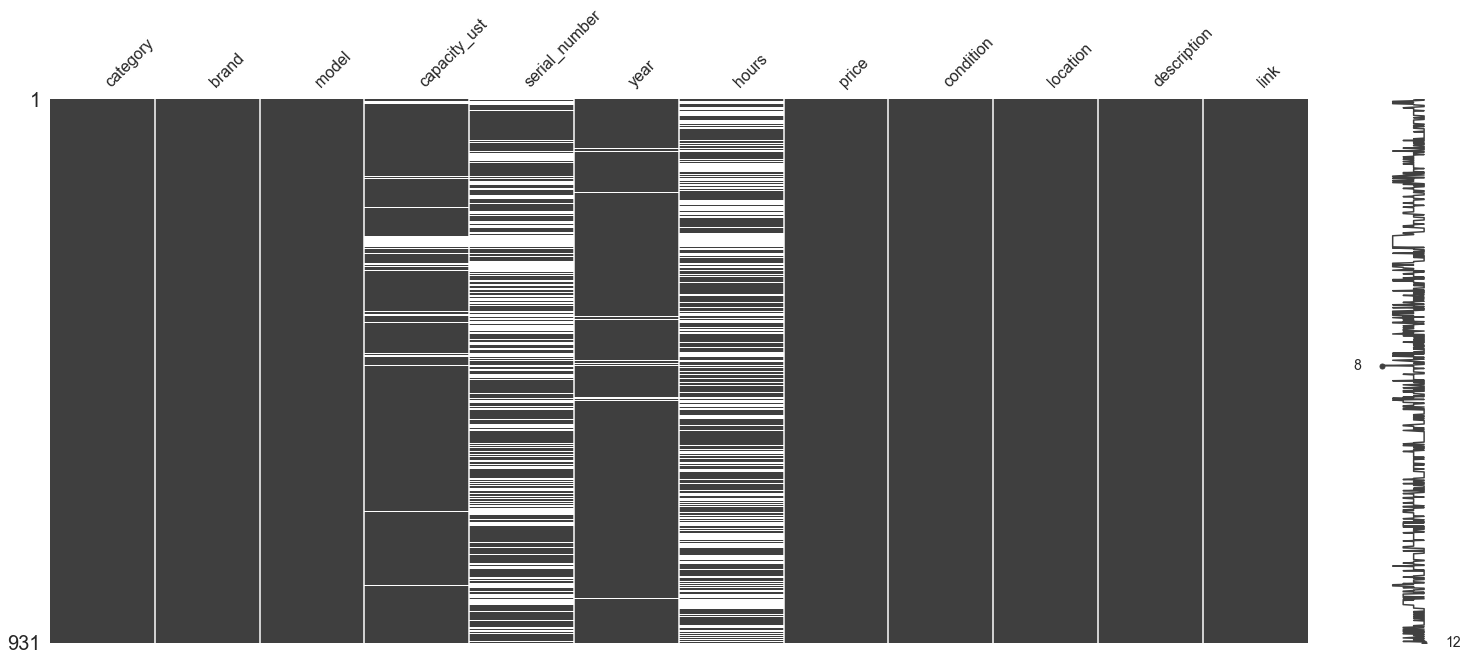

category           0
brand              0
model              0
capacity_ust      61
serial_number    382
year              16
hours            398
price              0
condition          0
location           0
description        0
link               0
dtype: int64

In [5921]:
# Missingno: Useful package for visualizing and understanding missing data
# In terminal: pip3 install missingno
import missingno as msno

# Plot missingness
msno.matrix(df)
plt.show()

# Total empty values by column
df.isna().sum()

In [5922]:
# Drop rows with 'For Rent Only' & 'Auction' values in price column. Because we only focus in products to sold not for rent
df.drop(df[(df['price'] == 'For Rent Only') | (df['price'] == 'Auction')].index, inplace = True)
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,location,description,link
0,\nRough Terrain Cranes,\nTerex,\nRT 100US,100.00,None,\n2020,\n54,"$599,000 USD",\nNew,"Location: Gary, IN, USA",New 2020 Terex RT100|39' - 154' Main Boom|\nSw...,https://cranemarket.com/new-2020-terex-rt-100-...
1,\nRough Terrain Cranes,\nGrove,\nRT530E-2,30.00,\n226299,\n2007,"\n4,578 as of 12/09/22",Price On Request,\nVery Good,"Location: 500 World Commerce Pkwy, St. Augusti...",S/N: 226299 EQUIPPED WITH 29'-95'4-SECTION BOO...,https://cranemarket.com/grove-rt530e-30-ton-ro...
2,\nRough Terrain Cranes,\nGrove,\nGRT8100,100.00,\n235616,\n2016,"\n4,535",Price On Request,\nVery Good,Location: 500 World Commerce Pkwy St. Augustin...,ONE 2016 GROVE GRT8100 SN 235616 ROUGH TERRAIN...,https://cranemarket.com/grove-grt8100-100-ton-...
3,\nRough Terrain Cranes,\nTadano,\nGR-750XL,75.00,None,\n2013,"\n7,927",Price On Request,\nUsed,"Location: Cropac Equipment Inc, South Service ...",75 US ton capacity|36.1’ - 141.1’ five-section...,https://cranemarket.com/2013-tadano-gr-750xl-7...
4,\nRough Terrain Cranes,\nTadano,\nGR-550XL-3,None,None,\n2017,None,"$400,000 USD",\nUsed,"Location: San Leandro, CA",,https://cranemarket.com/tadano-gr-550xl-3-for-...
...,...,...,...,...,...,...,...,...,...,...,...,...
926,\nRough Terrain Cranes,\nGrove,\nRT522,22.00,\n66193,\n1983,\n2672,"$29,900 USD",\nAs Is,"Location: Sparrow Bush, NY, United States",Detroit 4-53 4 cylinder natural diesel mech |T...,https://cranemarket.com/grove-rt522-22-ton-rou...
927,\nRough Terrain Cranes,\nGrove,\nRT58,14.00,\n30987,\n1975,\n4045,"$18,900 USD",\nGood,"Location: Sparrow Bush, NY, United States",Transmission: 3 speed automatic |Tires: 17.5-2...,https://cranemarket.com/grove-rt58-14-ton-down...
928,\nRough Terrain Cranes,\nGrove,\nRT755,55.00,None,\n1975,None,"$90,000 USD",\nUsed,Location: Mexico,"34' - 116’ 4-Section Full-Power Boom,|No Jib,|...",https://cranemarket.com/1975-grove-rt755-55-to...
929,\nRough Terrain Cranes,\nGrove,\nRT58,14.00,\n19980,\n1972,\n2511,"$18,900 USD",\nGood,"Location: Sparrow Bush, NY, United States",Transmission 3-speed automatic |Tires: 17.5-25...,https://cranemarket.com/grove-rt58-14-ton-down...


In [5923]:
# Cleaning all 'category' column

# Scan
df['category'].describe()
df['category'].unique()

# Clean
df['category'] = df['category'].str.strip('\n')
df['category'] = df['category'].str.strip(' ')

# # Check
# df['category'].describe()
# df['category'].unique()

In [5924]:
# Cleaning all 'brand' column

# Scan
df['brand'].describe()
df['brand'].unique()

# Clean
df['brand'] = df['brand'].str.strip('\n')
df['brand'] = df['brand'].str.strip(' ')
df['brand'] = df['brand'].str.strip('\t')

# # Check
# df['brand'].describe()
# df['brand'].unique()

In [5925]:
# Cleaning all 'model' column

# Scan
df['model'].describe()
df['model'].unique()

# Clean
df['model'] = df['model'].str.strip('\n')
df['model'] = df['model'].str.strip(' ')

# # Check
# df['model'].describe()
# df['model'].unique()

In [5926]:
# Cleaning all 'capacity_ust' column

# Scan
df['capacity_ust'].describe()
df['capacity_ust'].unique()

# Clean
df['capacity_ust'] = df['capacity_ust'].str.strip(' ')

# # Check
# df['capacity_ust'].describe()
# df['capacity_ust'].unique()

In [5927]:
# Cleaning all 'serial_number' column

# Scan
df['serial_number'].describe()
df['serial_number'].unique()

# Clean
df['serial_number'] = df['serial_number'].str.strip('\n')
df['serial_number'] = df['serial_number'].str.strip(' ')

# # Check
# df['serial_number'].describe()
# df['serial_number'].unique()

In [5928]:
# Cleaning all 'year' column

# Scan
df['year'].describe()
df['year'].unique()

# Clean
df['year'] = df['year'].str.strip('\n')
df['year'] = df['year'].str.strip(' ')

# # Check
# df['year'].describe()
# df['year'].unique()

In [5929]:
# Cleaning all 'hours' column

# Scan
df['hours'].describe()
df['hours'].unique()

# Clean
df['hours'] = df['hours'].str.strip('\n ')
df['hours'] = df['hours'].str.split(' ').str[0] # to clean from a specific character to the right side
df['hours'] = df['hours'].str.replace(',', '')
df['hours'] = df['hours'].str.strip('.')

# # Check
# df['hours'].describe()
# df['hours'].unique()

In [5930]:
# Cleaning all 'price' column

# Scan
df['price'].describe()
df['price'].unique()

# Clean
df['price'] = df['price'].str.replace('Price On Request', str(np.nan))
df['price'] = df['price'].str.strip('\n')
df['price'] = df['price'].str.strip('EUR')
df['price'] = df['price'].str.strip('USD')
df['price'] = df['price'].str.strip('$')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip('.')
df['price'] = df['price'].str.strip(' ')

# # Check
# df['price'].describe()
# df['price'].unique()

In [5931]:
# Cleaning all 'condition' column

# Scan
df['condition'].describe()
df['condition'].unique()

# Clean
df['condition'] = df['condition'].str.replace('Like ', '')
df['condition'] = df['condition'].str.replace('Like_', '')
df['condition'] = df['condition'].str.strip('\n')
df['condition'] = df['condition'].str.strip(' ')
df['condition'] = df['condition'].str.strip('\t')

# # Check
# df['condition'].describe()
# df['condition'].unique()

In [5932]:
# Cleaning all 'location' column

# Scan
df['location'].describe()
df['location'].unique()

# Clean
df['location'] = df['location'].str.replace('Location: ', '')

# Create new country column with territory dictionaries
us = {
    "USA": "US",
    "United States": "USA",
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    "Columbia": "Missouri",
    "Angle Rd": "FL"
}

canada = {
    'Canada': 'CA',
    'Alberta': 'AB',
    'British Columbia': 'BC',
    'Manitoba': 'MB',
    'New Brunswick': 'NB',
    'Newfoundland and Labrador': 'NL',
    'Northwest Territories': 'NT',
    'Nova Scotia': 'NS',
    'Nunavut': 'NU',
    'Ontario': 'ON',
    'Prince Edward Island': 'PE',
    'Quebec': 'QC',
    'Saskatchewan': 'SK',
    'Yukon': 'YT'
}

# Create the country column
df['country'] = df['location'].apply(lambda x: 'USA' if any([i in x for i in (list(us.keys()) + list(us.values()))]) else x)
df['country'] = df['country'].apply(lambda x: 'Canada' if any([i in x for i in (list(canada.keys()) + list(canada.values()))]) else x)
df['country'] = df['country'].str.rsplit(', ').str[-1]

# # Check
# df['country'].describe()
# df['country'].unique()



In [5933]:
# Replace 'location' to 'country' column
df = df[['category', 'brand', 'model', 'capacity_ust', 'serial_number', 'year', 'hours', 'price','condition', 'country', 'description', 'link']]
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,country,description,link
0,Rough Terrain Cranes,Terex,RT 100US,100.00,None,2020,54,599000,New,USA,New 2020 Terex RT100|39' - 154' Main Boom|\nSw...,https://cranemarket.com/new-2020-terex-rt-100-...
1,Rough Terrain Cranes,Grove,RT530E-2,30.00,226299,2007,4578,nan,Very Good,USA,S/N: 226299 EQUIPPED WITH 29'-95'4-SECTION BOO...,https://cranemarket.com/grove-rt530e-30-ton-ro...
2,Rough Terrain Cranes,Grove,GRT8100,100.00,235616,2016,4535,nan,Very Good,USA,ONE 2016 GROVE GRT8100 SN 235616 ROUGH TERRAIN...,https://cranemarket.com/grove-grt8100-100-ton-...
3,Rough Terrain Cranes,Tadano,GR-750XL,75.00,None,2013,7927,nan,Used,Canada,75 US ton capacity|36.1’ - 141.1’ five-section...,https://cranemarket.com/2013-tadano-gr-750xl-7...
4,Rough Terrain Cranes,Tadano,GR-550XL-3,None,None,2017,None,400000,Used,USA,,https://cranemarket.com/tadano-gr-550xl-3-for-...
...,...,...,...,...,...,...,...,...,...,...,...,...
926,Rough Terrain Cranes,Grove,RT522,22.00,66193,1983,2672,29900,As Is,USA,Detroit 4-53 4 cylinder natural diesel mech |T...,https://cranemarket.com/grove-rt522-22-ton-rou...
927,Rough Terrain Cranes,Grove,RT58,14.00,30987,1975,4045,18900,Good,USA,Transmission: 3 speed automatic |Tires: 17.5-2...,https://cranemarket.com/grove-rt58-14-ton-down...
928,Rough Terrain Cranes,Grove,RT755,55.00,None,1975,None,90000,Used,Mexico,"34' - 116’ 4-Section Full-Power Boom,|No Jib,|...",https://cranemarket.com/1975-grove-rt755-55-to...
929,Rough Terrain Cranes,Grove,RT58,14.00,19980,1972,2511,18900,Good,USA,Transmission 3-speed automatic |Tires: 17.5-25...,https://cranemarket.com/grove-rt58-14-ton-down...


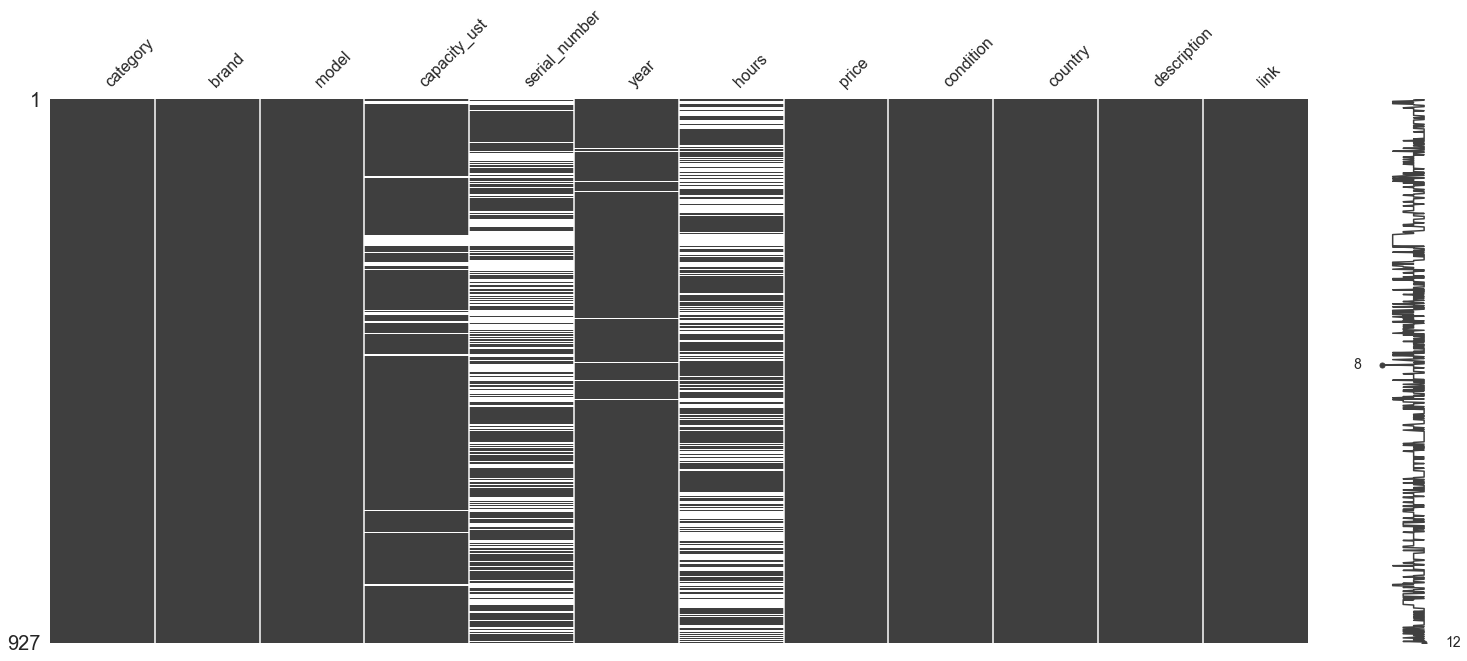

category           0
brand              0
model              0
capacity_ust      61
serial_number    379
year              15
hours            396
price              0
condition          0
country            0
description        0
link               0
dtype: int64

In [5934]:
# Plot missingness
msno.matrix(df)
plt.show()

# Total empty values per column
df.isna().sum()

In [5935]:
# Convert columns to category data type, to do this is necessary to make a copy of df
df = df.copy()

columns_to_category =  ['category', 'brand', 'model', 'condition', 'country']
df[columns_to_category] = df[columns_to_category].apply(lambda x: x.astype('category'))

columns_to_float = ['capacity_ust', 'year', 'hours', 'price']
df[columns_to_float] = df[columns_to_float].apply(lambda x: x.astype('float'))

 #
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 930
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   category       927 non-null    category
 1   brand          927 non-null    category
 2   model          927 non-null    category
 3   capacity_ust   866 non-null    float64 
 4   serial_number  548 non-null    object  
 5   year           912 non-null    float64 
 6   hours          531 non-null    float64 
 7   price          431 non-null    float64 
 8   condition      927 non-null    category
 9   country        927 non-null    category
 10  description    927 non-null    object  
 11  link           927 non-null    object  
dtypes: category(5), float64(4), object(3)
memory usage: 70.4+ KB


# 3. Exploratory Data Analysis

# 3.1. EDA Full Market (with empty values in 'Price' column)

In [5936]:
# Read DataFrame, keeping in mind that price rows with 0 values were not removed
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,country,description,link
0,Rough Terrain Cranes,Terex,RT 100US,100.0,None,2020.0,54.0,599000.0,New,USA,New 2020 Terex RT100|39' - 154' Main Boom|\nSw...,https://cranemarket.com/new-2020-terex-rt-100-...
1,Rough Terrain Cranes,Grove,RT530E-2,30.0,226299,2007.0,4578.0,NaN,Very Good,USA,S/N: 226299 EQUIPPED WITH 29'-95'4-SECTION BOO...,https://cranemarket.com/grove-rt530e-30-ton-ro...
2,Rough Terrain Cranes,Grove,GRT8100,100.0,235616,2016.0,4535.0,NaN,Very Good,USA,ONE 2016 GROVE GRT8100 SN 235616 ROUGH TERRAIN...,https://cranemarket.com/grove-grt8100-100-ton-...
3,Rough Terrain Cranes,Tadano,GR-750XL,75.0,None,2013.0,7927.0,NaN,Used,Canada,75 US ton capacity|36.1’ - 141.1’ five-section...,https://cranemarket.com/2013-tadano-gr-750xl-7...
4,Rough Terrain Cranes,Tadano,GR-550XL-3,NaN,None,2017.0,NaN,400000.0,Used,USA,,https://cranemarket.com/tadano-gr-550xl-3-for-...
...,...,...,...,...,...,...,...,...,...,...,...,...
926,Rough Terrain Cranes,Grove,RT522,22.0,66193,1983.0,2672.0,29900.0,As Is,USA,Detroit 4-53 4 cylinder natural diesel mech |T...,https://cranemarket.com/grove-rt522-22-ton-rou...
927,Rough Terrain Cranes,Grove,RT58,14.0,30987,1975.0,4045.0,18900.0,Good,USA,Transmission: 3 speed automatic |Tires: 17.5-2...,https://cranemarket.com/grove-rt58-14-ton-down...
928,Rough Terrain Cranes,Grove,RT755,55.0,None,1975.0,NaN,90000.0,Used,Mexico,"34' - 116’ 4-Section Full-Power Boom,|No Jib,|...",https://cranemarket.com/1975-grove-rt755-55-to...
929,Rough Terrain Cranes,Grove,RT58,14.0,19980,1972.0,2511.0,18900.0,Good,USA,Transmission 3-speed automatic |Tires: 17.5-25...,https://cranemarket.com/grove-rt58-14-ton-down...


In [5937]:
# Define top values for sns plots with df

# Define top level value
top = 5

# Define top index
brand_top_index = pd.DataFrame(df['brand'].value_counts().sort_values(ascending=False)).index[:top]
model_top_index = pd.DataFrame(df['model'].value_counts().sort_values(ascending=False)).index[:top]
capacity_ust_top_index = pd.DataFrame(df['capacity_ust'].value_counts().sort_values(ascending=False)).index[:top]
year_top_index = pd.DataFrame(df['year'].value_counts().sort_values(ascending=False)).index[:top]
country_top_index = pd.DataFrame(df['country'].value_counts().sort_values(ascending=False)).index[:top]
condition_top_index = pd.DataFrame(df['condition'].value_counts().sort_values(ascending=False)).index[:top]

# Defince top index values
brand_top_values = df['brand'].value_counts().sort_values(ascending=False).values[:top]
model_top_values = df['model'].value_counts().sort_values(ascending=False).values[:top]
capacity_top_values = df['capacity_ust'].value_counts().sort_values(ascending=False).values[:top]
year_top_values = df['year'].value_counts().sort_values(ascending=False).values[:top]
country_top_values = df['country'].value_counts().sort_values(ascending=False).values[:top]
condition_top_values = df['condition'].value_counts().sort_values(ascending=False).values[:top]

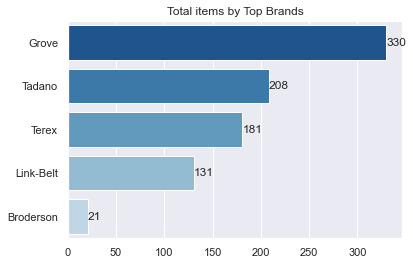

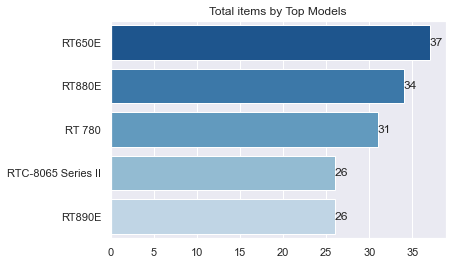

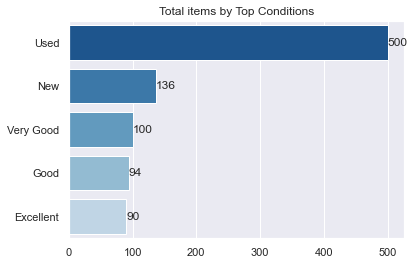

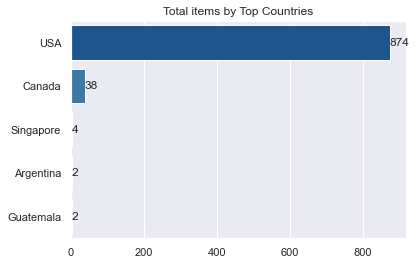

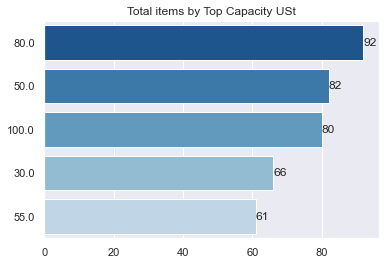

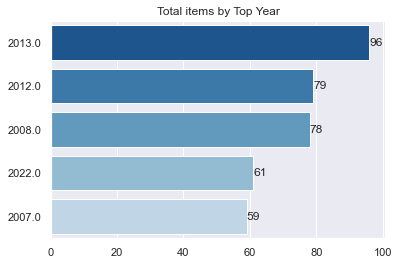

,capacity_ust,year,hours,price
count,866.000000,912.000000,531.000000,4.310000e+02
mean,67.533718,2010.532895,5320.785467,2.596502e+05
std,34.415779,9.146269,3925.584827,2.217692e+05
min,7.500000,1969.000000,4.150000,9.900000e+03
25%,45.000000,2007.000000,2000.000000,1.090000e+05
50%,65.000000,2012.000000,4775.000000,1.990000e+05
75%,90.000000,2016.000000,8071.000000,3.470000e+05
max,160.000000,2022.000000,23039.000000,1.483754e+06


In [5938]:
# Categorical Plots

# Keeping in mind that price rows with 0 values were not removed
# With rows with 0 values is not possible to convert data to int (for now)

# Top Brands
top_brand_plot = sns.countplot(y='brand', data=df, order=brand_top_index)
top_brand_plot.set(title='Total items by Top Brands', xlabel=None, ylabel=None)
top_brand_plot.bar_label(container=top_brand_plot.containers[0], labels=brand_top_values)
plt.show()

# Top Models
top_model_plot = sns.countplot(y='model', data=df, order=model_top_index)
top_model_plot.set(title='Total items by Top Models', xlabel=None, ylabel=None)
top_model_plot.bar_label(container=top_model_plot.containers[0], labels=model_top_values)
plt.show()

# Top Conditions
top_condition_plot = sns.countplot(y='condition', data=df, order=condition_top_index)
top_condition_plot.set(title='Total items by Top Conditions', xlabel=None, ylabel=None)
top_condition_plot.bar_label(container=top_condition_plot.containers[0], labels=condition_top_values)
plt.show()

# Top Countries
top_countries_plot = sns.countplot(y='country', data=df, order=country_top_index)
top_countries_plot.set(title='Total items by Top Countries', xlabel=None, ylabel=None)
top_countries_plot.bar_label(container=top_countries_plot.containers[0], labels=country_top_values)
plt.show()

# Top Capacity USt
top_capacity_ust_plot = sns.countplot(y='capacity_ust', data=df, order=capacity_ust_top_index)
top_capacity_ust_plot.set(title='Total items by Top Capacity USt', xlabel=None, ylabel=None)
top_capacity_ust_plot.bar_label(container=top_capacity_ust_plot.containers[0], labels=capacity_top_values)
plt.show()

# Top Year
top_year_plot = sns.countplot(y='year', data=df, order=year_top_index)
top_year_plot.set(title='Total items by Top Year', xlabel=None, ylabel=None)
top_year_plot.bar_label(container=top_year_plot.containers[0], labels=year_top_values)
plt.show()

df_describe = pd.DataFrame(df.describe())
df_describe

# 3.2. EDA Full Market (without empty values in 'Price' column)

In [5939]:
# Extract price rows with 0 values, not consider 'serial_number' cause is not important
df_clean = df[['category', 'brand', 'model', 'capacity_ust', 'year', 'hours', 'price','condition', 'country']].dropna()

# Now that we don't have empty values, we can convert float to int
# We'll only focus on import columns for predict models

columns_to_int = ['capacity_ust', 'year', 'hours', 'price']
df_clean[columns_to_int] = df_clean[columns_to_int].apply(lambda x: x.astype('int'))
df_clean

,category,brand,model,capacity_ust,year,hours,price,condition,country
0,Rough Terrain Cranes,Terex,RT 100US,100,2020,54,599000,New,USA
6,Rough Terrain Cranes,Tadano,TR-150XL-4,15,2006,4399,90000,Used,USA
9,Rough Terrain Cranes,Grove,RT540E,40,2011,9298,140000,Used,USA
10,Rough Terrain Cranes,Link-Belt,75RT,75,2018,200,706020,Used,USA
19,Rough Terrain Cranes,Zoomlion,RT60,70,2019,80,415000,New,USA
...,...,...,...,...,...,...,...,...,...
923,Rough Terrain Cranes,Tadano,TR-300XL,30,1998,5400,29900,Very Good,USA
926,Rough Terrain Cranes,Grove,RT522,22,1983,2672,29900,As Is,USA
927,Rough Terrain Cranes,Grove,RT58,14,1975,4045,18900,Good,USA
929,Rough Terrain Cranes,Grove,RT58,14,1972,2511,18900,Good,USA


In [5940]:
# df for train_test split
df_ml = df_clean.copy()

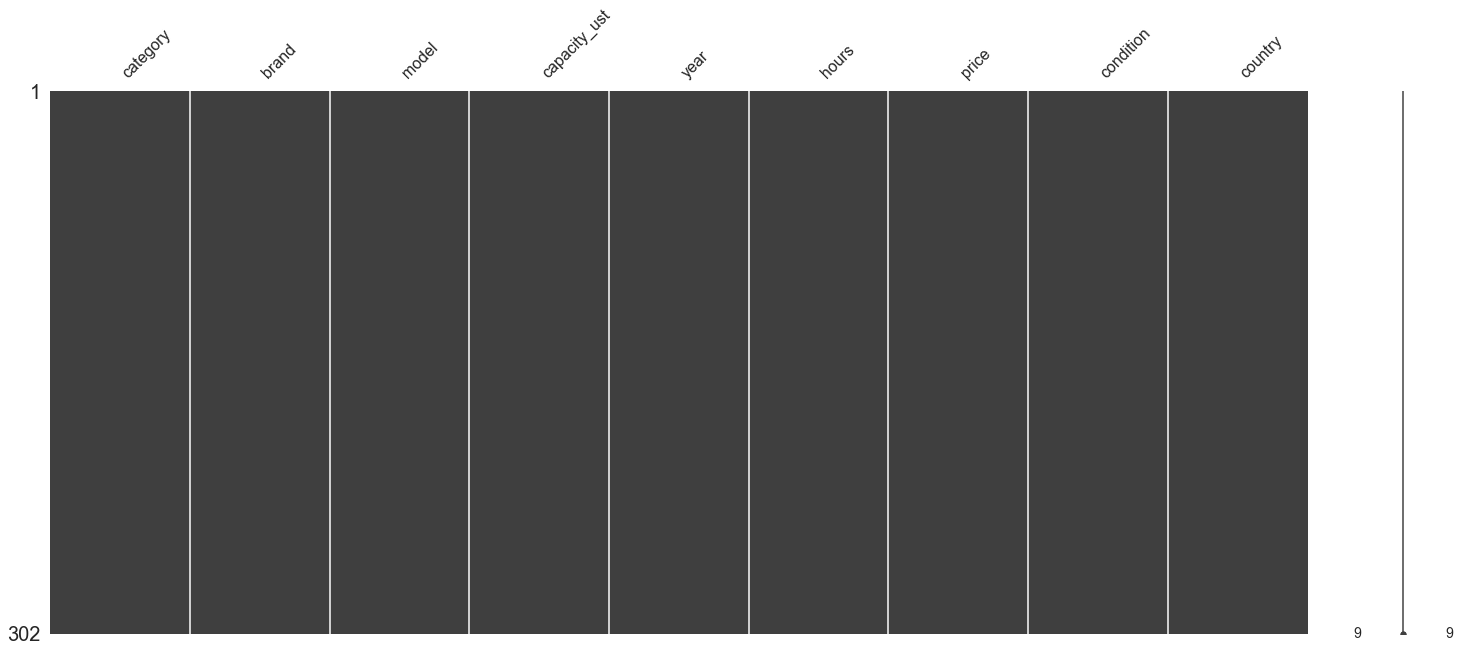

category        0
brand           0
model           0
capacity_ust    0
year            0
hours           0
price           0
condition       0
country         0
dtype: int64

In [5941]:
# Plot missingness
msno.matrix(df_clean)
plt.show()

# Total empty values per column
df_clean.isna().sum()

In [5942]:
# Define top values for sns plots with df_clean

# Define top level value
top = 5

# Define top index
brand_top_index2 = pd.DataFrame(df_clean['brand'].value_counts().sort_values(ascending=False)).index[:top]
model_top_index2 = pd.DataFrame(df_clean['model'].value_counts().sort_values(ascending=False)).index[:top]
capacity_ust_top_index2 = pd.DataFrame(df_clean['capacity_ust'].value_counts().sort_values(ascending=False)).index[:top]
year_top_index2 = pd.DataFrame(df_clean['year'].value_counts().sort_values(ascending=False)).index[:top]
country_top_index2 = pd.DataFrame(df_clean['country'].value_counts().sort_values(ascending=False)).index[:top]
condition_top_index2 = pd.DataFrame(df_clean['condition'].value_counts().sort_values(ascending=False)).index[:top]

# Defince top index values
brand_top_values2 = df_clean['brand'].value_counts().sort_values(ascending=False).values[:top]
model_top_values2 = df_clean['model'].value_counts().sort_values(ascending=False).values[:top]
capacity_top_values2 = df_clean['capacity_ust'].value_counts().sort_values(ascending=False).values[:top]
year_top_values2 = df_clean['year'].value_counts().sort_values(ascending=False).values[:top]
country_top_values2 = df_clean['country'].value_counts().sort_values(ascending=False).values[:top]
condition_top_values2 = df_clean['condition'].value_counts().sort_values(ascending=False).values[:top]

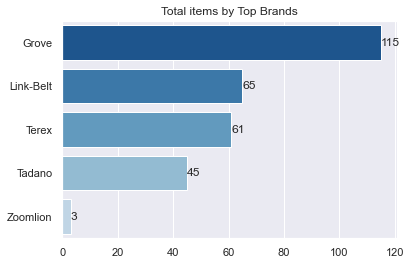

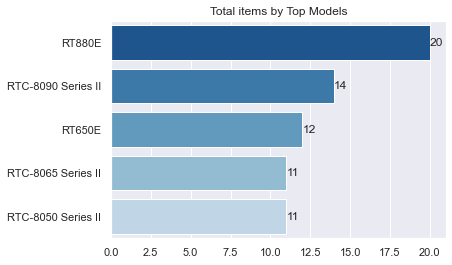

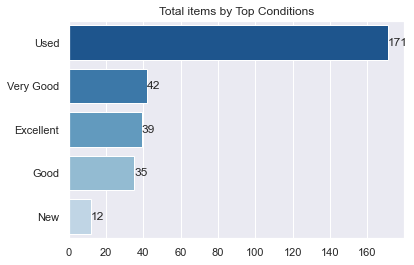

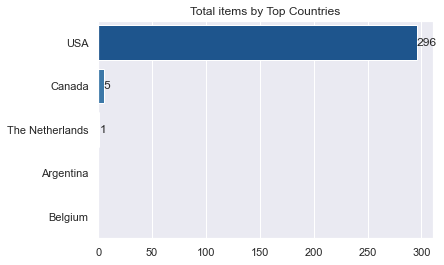

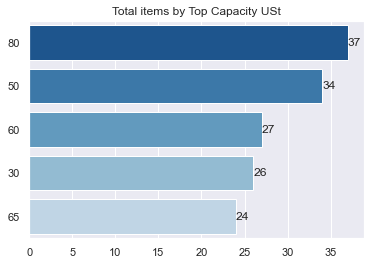

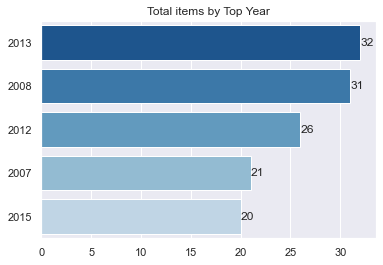

In [5943]:
# Categorical Plots

# Top Brands
top_brand_plot2 = sns.countplot(y='brand', data=df_clean, order=brand_top_index2)
top_brand_plot2.set(title='Total items by Top Brands', xlabel=None, ylabel=None)
top_brand_plot2.bar_label(container=top_brand_plot2.containers[0], labels=brand_top_values2)
plt.show()

# Top Models
top_model_plot2 = sns.countplot(y='model', data=df_clean, order=model_top_index2)
top_model_plot2.set(title='Total items by Top Models', xlabel=None, ylabel=None)
top_model_plot2.bar_label(container=top_model_plot2.containers[0], labels=model_top_values2)
plt.show()

# Top Conditions
top_condition_plot2 = sns.countplot(y='condition', data=df_clean, order=condition_top_index2)
top_condition_plot2.set(title='Total items by Top Conditions', xlabel=None, ylabel=None)
top_condition_plot2.bar_label(container=top_condition_plot2.containers[0], labels=condition_top_values2)
plt.show()

# Top Countries
top_countries_plot2 = sns.countplot(y='country', data=df_clean, order=country_top_index2)
top_countries_plot2.set(title='Total items by Top Countries', xlabel=None, ylabel=None)
top_countries_plot2.bar_label(container=top_countries_plot2.containers[0], labels=country_top_values2)
plt.show()

# Top Capacity USt
top_capacity_ust_plot2 = sns.countplot(y='capacity_ust', data=df_clean, order=capacity_ust_top_index2)
top_capacity_ust_plot2.set(title='Total items by Top Capacity USt', xlabel=None, ylabel=None)
top_capacity_ust_plot2.bar_label(container=top_capacity_ust_plot2.containers[0], labels=capacity_top_values2)
plt.show()

# Top Year
top_year_plot2 = sns.countplot(y='year', data=df_clean, order=year_top_index2)
top_year_plot2.set(title='Total items by Top Year', xlabel=None, ylabel=None)
top_year_plot2.bar_label(container=top_year_plot2.containers[0], labels=year_top_values2)
plt.show()

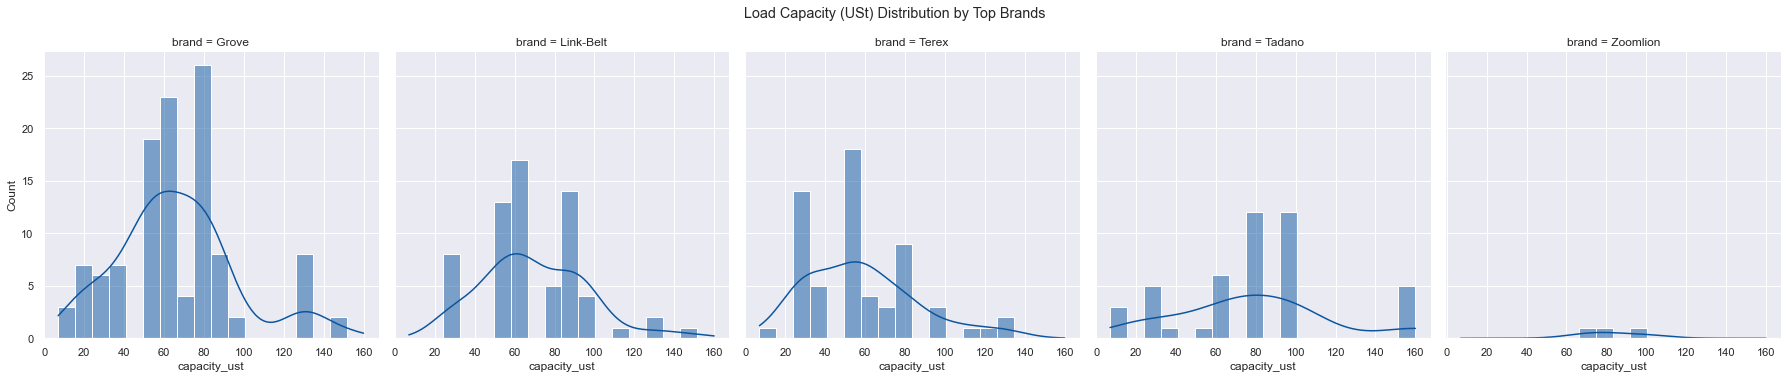

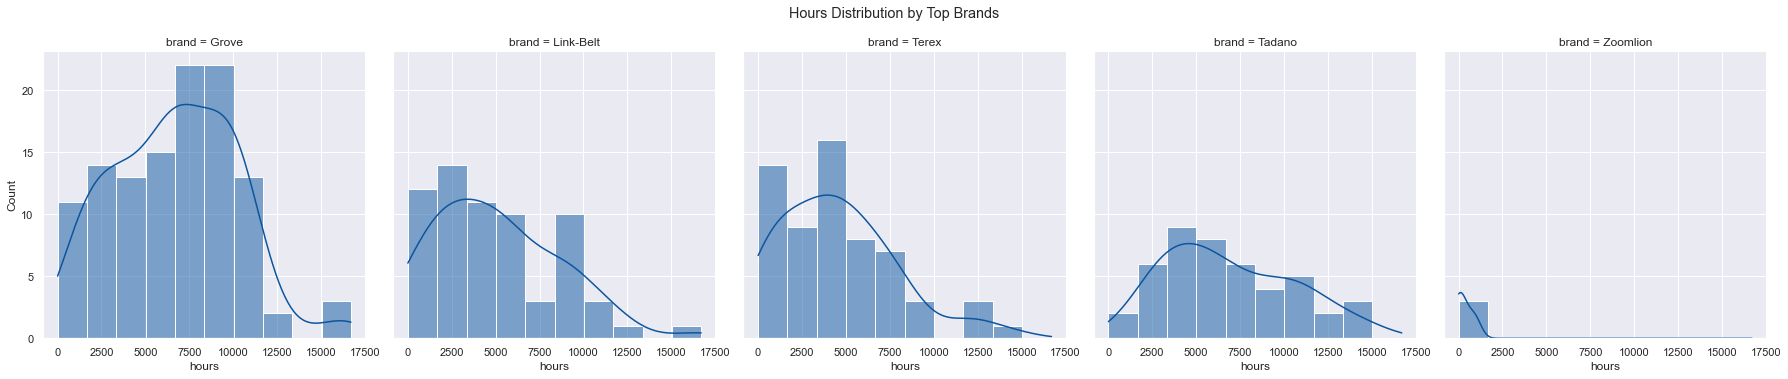

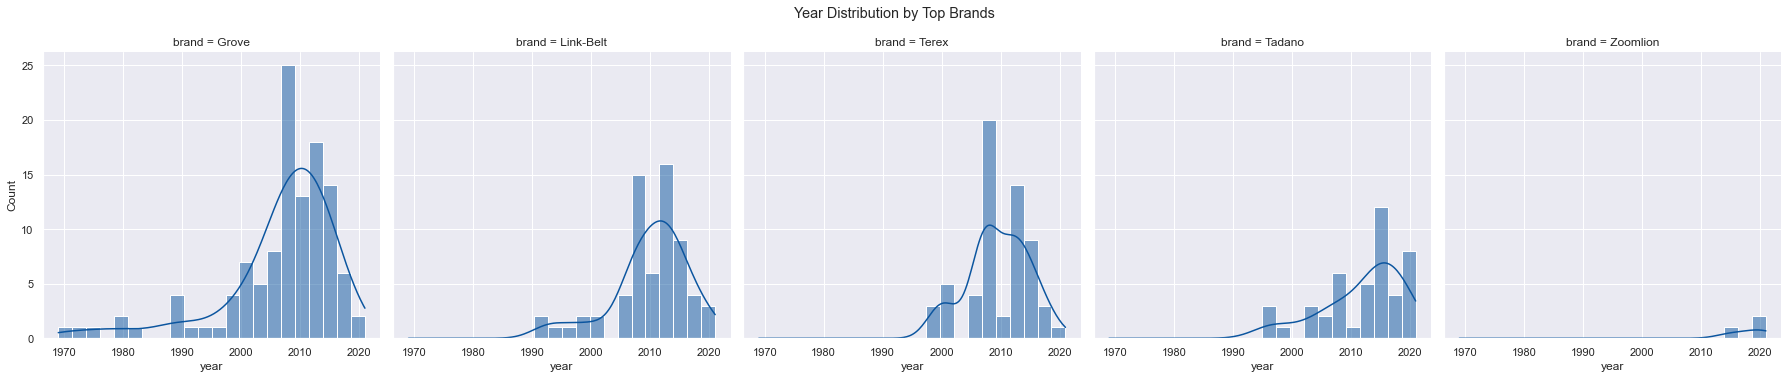

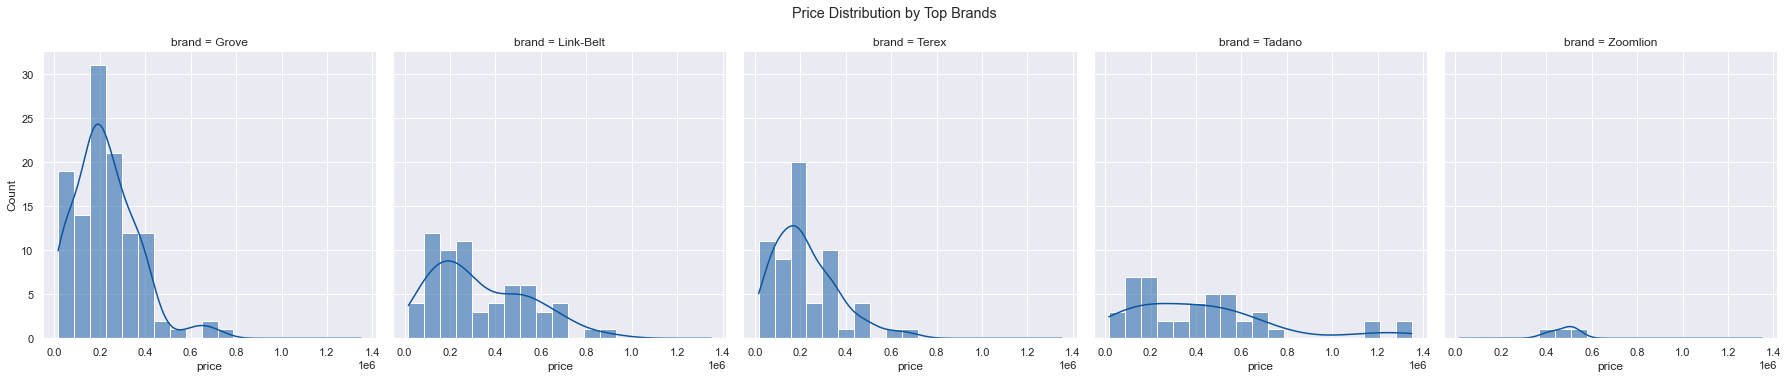

In [5944]:
sns.displot(data=df_clean, x='capacity_ust', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Load Capacity (USt) Distribution by Top Brands', y=1.05)
sns.displot(data=df_clean, x='hours', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Hours Distribution by Top Brands', y=1.05)
sns.displot(data=df_clean, x='year', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Year Distribution by Top Brands', y=1.05)
sns.displot(data=df_clean, x='price', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Price Distribution by Top Brands', y=1.05)
plt.show()

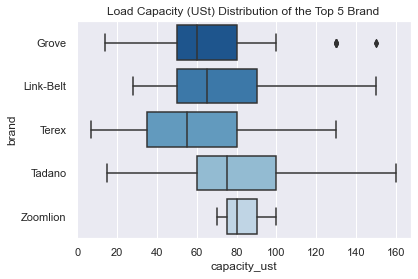

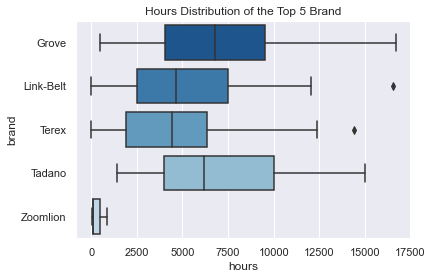

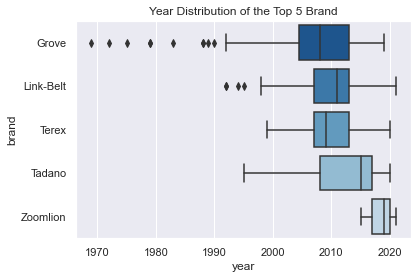

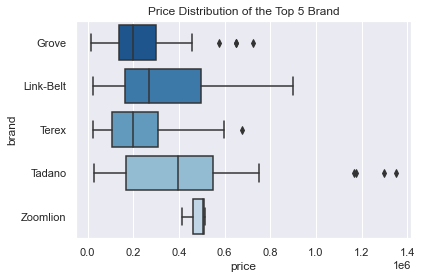

In [5945]:
# Boxplots: Shows the distribution of quantitative data, See median, spread, skewness, and outliers, Facilitates comparisons between groups
sns.boxplot(x='capacity_ust', y='brand', data=df_clean, order=brand_top_index2).set(title='Load Capacity (USt) Distribution of the Top 5 Brand')
plt.show()
sns.boxplot(x='hours', y='brand', data=df_clean, order=brand_top_index2).set(title='Hours Distribution of the Top 5 Brand')
plt.show()
sns.boxplot(x='year', y='brand', data=df_clean, order=brand_top_index2).set(title='Year Distribution of the Top 5 Brand')
plt.show()
sns.boxplot(x='price', y='brand', data=df_clean, order=brand_top_index2).set(title='Price Distribution of the Top 5 Brand')
plt.show()

In [5946]:
df_clean_describe = pd.DataFrame(df_clean.describe())
df_clean_describe

,capacity_ust,year,hours,price
count,302.000000,302.000000,302.000000,3.020000e+02
mean,65.807947,2008.668874,5729.086093,2.736200e+05
std,31.231579,8.222182,3695.562667,2.101391e+05
min,7.000000,1969.000000,5.000000,1.650000e+04
25%,50.000000,2006.000000,2715.000000,1.300000e+05
50%,65.000000,2011.000000,5350.000000,2.217500e+05
75%,80.000000,2014.000000,8459.750000,3.735000e+05
max,160.000000,2021.000000,16700.000000,1.350000e+06


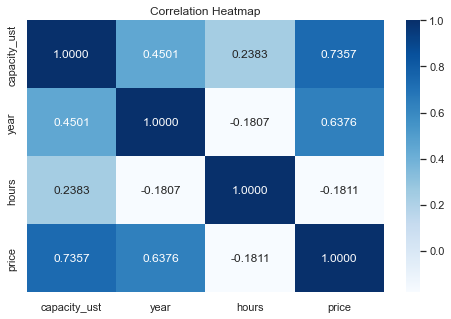

In [5947]:
# Correlation matrix 
sns.set()
sns.set_palette('Blues_r')
plt.figure(figsize=(8, 5))

columns_corr = ['capacity_ust', 'year', 'hours', 'price']
subset = df_clean[columns_corr]
dataplot = sns.heatmap(subset.corr(), cmap='Blues', annot=True, fmt='.4f').set(title='Correlation Heatmap')

Text(0.5, 1.02, 'Distribution and Correlation Diagrams')

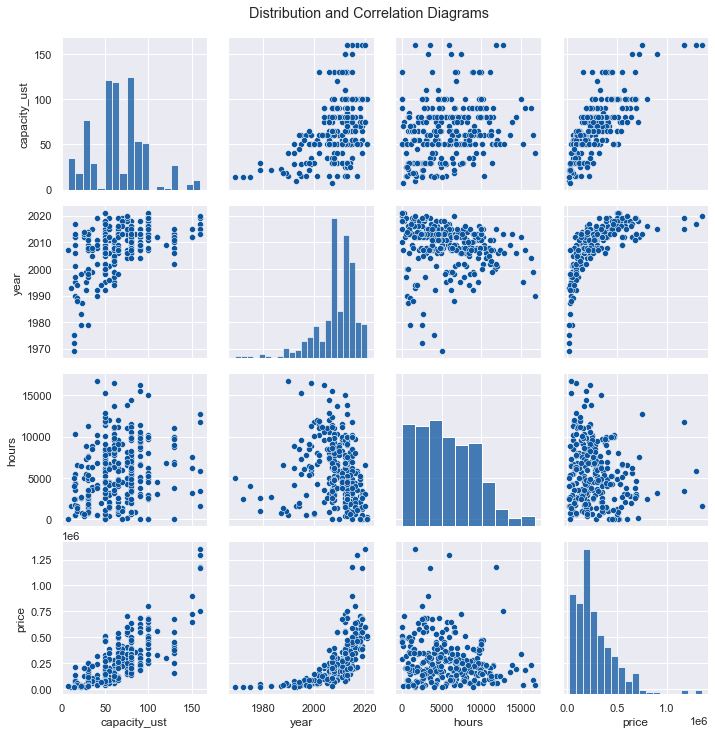

In [5948]:
# Distribution matrix
g = sns.PairGrid(df_clean)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('Distribution and Correlation Diagrams', y=1.02)

{'mean': 1.7606404957157789, 'std': 0.24216393478381612}


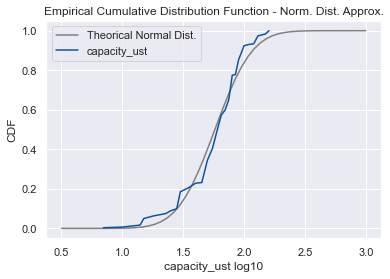

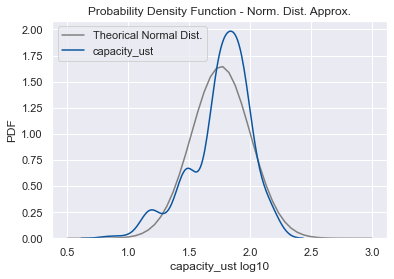

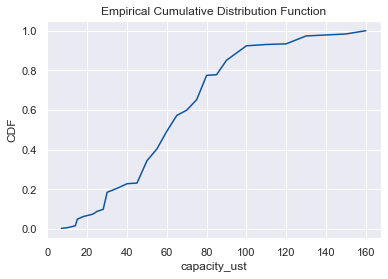

P(x < 20USt):  6.29%
P(x < 40USt):  22.85%
P(x < 60USt):  49.34%
P(x < 80USt):  77.48%
P(x < 100USt):  92.38%


In [5949]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# capacity_ust distribution is approximately lognormal,
# which means that the logarithms of the capacity_ust fit a normal distribution.

log_capacity_ust = np.log10(df_clean['capacity_ust'])
mean = log_capacity_ust.mean()
std = log_capacity_ust.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of capacity_ust
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of capacity_ust is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(0.5, 3)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_capacity_ust).plot(label='capacity_ust')
plt.title('Empirical Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('capacity_ust log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(0.5, 3)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_capacity_ust, label='capacity_ust')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('capacity_ust log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_capacity_ust = Cdf.from_seq(df_clean['capacity_ust'])
ecdf_capacity_ust.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('capacity_ust')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con capacidad de carga menor a 20 USt?
print('P(x < 20USt): ', '{:.2%}'.format(ecdf_capacity_ust(20)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con capacidad de carga menor a 40 USt?
print('P(x < 40USt): ', '{:.2%}'.format(ecdf_capacity_ust(40)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con capacidad de carga menor a 60 USt?
print('P(x < 60USt): ', '{:.2%}'.format(ecdf_capacity_ust(60)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con capacidad de carga menor a 80 USt?
print('P(x < 80USt): ', '{:.2%}'.format(ecdf_capacity_ust(80)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con capacidad de carga menor a 100 USt?
print('P(x < 100USt): ', '{:.2%}'.format(ecdf_capacity_ust(100)))

{'mean': 3.302904706719267, 'std': 0.001783906421685564}


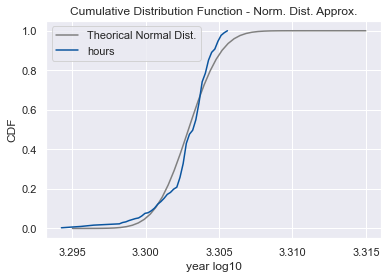

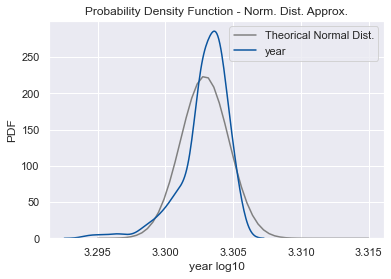

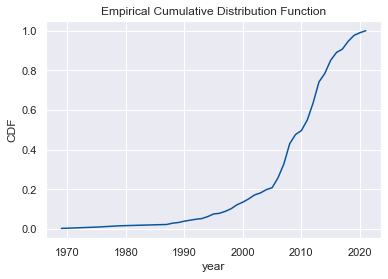

P(x < 2000):  13.58%
P(x < 2005):  20.86%
P(x < 2010):  49.67%
P(x < 2015):  85.10%
P(x < 2020):  99.01%


In [5950]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# year distribution is approximately lognormal,
# which means that the logarithms of the year fit a normal distribution.

log_year = np.log10(df_clean['year'])
mean = log_year.mean()
std = log_year.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of hours
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of hours is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(3.295, 3.315)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_year).plot(label='hours')
plt.title('Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('year log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(3.295, 3.315)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_year, label='year')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('year log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_year = Cdf.from_seq(df_clean['year'])
ecdf_year.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('year')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con año de fabricación por debajo de 2000?
print('P(x < 2000): ', '{:.2%}'.format(ecdf_year(2000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con año de fabricación por debajo de 2005?
print('P(x < 2005): ', '{:.2%}'.format(ecdf_year(2005)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con año de fabricación por debajo de 2010?
print('P(x < 2010): ', '{:.2%}'.format(ecdf_year(2010)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con año de fabricación por debajo de 2015?
print('P(x < 2015): ', '{:.2%}'.format(ecdf_year(2015)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con año de fabricación por debajo de 2020?
print('P(x < 2020): ', '{:.2%}'.format(ecdf_year(2020)))

{'mean': 3.588815050471754, 'std': 0.5392015520608824}


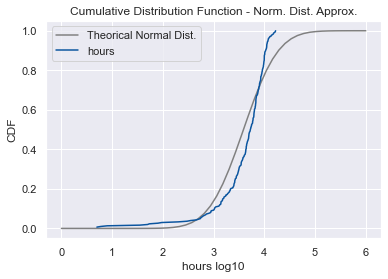

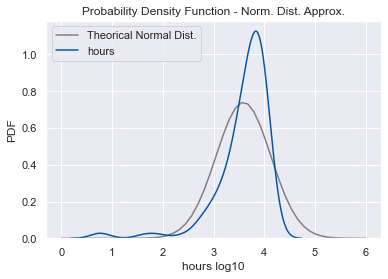

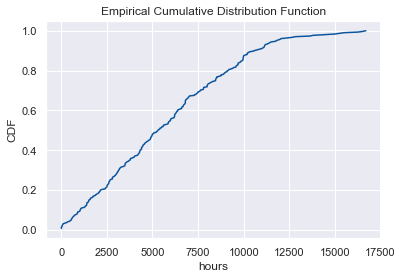

P(x < 1,000horas):  8.94%
P(x < 3,000horas):  27.81%
P(x < 5,000horas):  48.01%
P(x < 7,000horas):  66.89%
P(x < 9,000horas):  79.14%


In [5951]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# hours distribution is approximately lognormal,
# which means that the logarithms of the hours fit a normal distribution.

log_hours = np.log10(df_clean['hours'])
mean = log_hours.mean()
std = log_hours.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of hours
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of hours is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(0, 6)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_hours).plot(label='hours')
plt.title('Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('hours log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(0, 6)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_hours, label='hours')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('hours log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_hours = Cdf.from_seq(df_clean['hours'])
ecdf_hours.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('hours')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con horómetro menor a 1,000 horas?
print('P(x < 1,000horas): ', '{:.2%}'.format(ecdf_hours(1000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con horómetro menor a 3,000 horas?
print('P(x < 3,000horas): ', '{:.2%}'.format(ecdf_hours(3000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con horómetro menor a 5,000 horas?
print('P(x < 5,000horas): ', '{:.2%}'.format(ecdf_hours(5000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con horómetro menor a 7,000 horas?
print('P(x < 7,000horas): ', '{:.2%}'.format(ecdf_hours(7000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con horómetro menor a 9,000 horas?
print('P(x < 9,000horas): ', '{:.2%}'.format(ecdf_hours(9000)))

{'mean': 5.304209803127653, 'std': 0.3706399159508236}


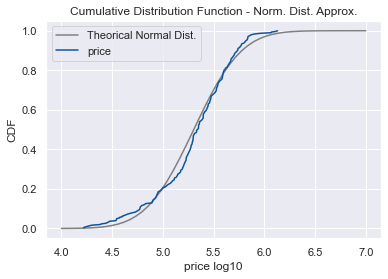

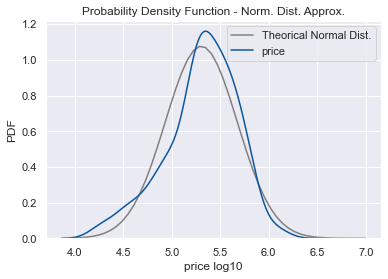

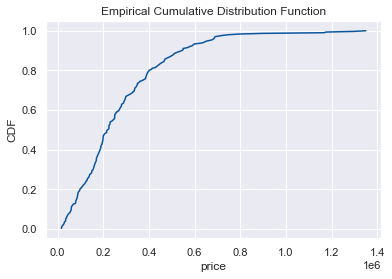

P(x < $100,000):  20.53%
P(x < $200,000):  47.02%
P(x < $300,000):  66.89%
P(x < $400,000):  79.80%
P(x < $500,000):  87.42%


In [5952]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# price distribution is approximately lognormal,
# which means that the logarithms of the price fit a normal distribution.

log_price = np.log10(df_clean['price'])
mean = log_price.mean()
std = log_price.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of price
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of price is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(4, 7)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_price).plot(label='price')
plt.title('Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('price log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(4, 7)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_price, label='price')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('price log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_price = Cdf.from_seq(df_clean['price'])
ecdf_price.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('price')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con precio menor a $100,000?
print('P(x < $100,000): ', '{:.2%}'.format(ecdf_price(100000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con precio menor a $200,000?
print('P(x < $200,000): ', '{:.2%}'.format(ecdf_price(200000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con precio menor a $300,000?
print('P(x < $300,000): ', '{:.2%}'.format(ecdf_price(300000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con precio menor a $400,000?
print('P(x < $400,000): ', '{:.2%}'.format(ecdf_price(400000)))
# En este dataset, cuál es la probabilidad de encontrar grúas RoughTerrain con precio menor a $500,000?
print('P(x < $500,000): ', '{:.2%}'.format(ecdf_price(500000)))

# Diferencias estadísticas en los Scatter Plots

In [5953]:
# capacity_ust vs price
from scipy.stats import bartlett

a = df_clean[(df_clean['capacity_ust'] >= 7) & (df_clean['capacity_ust'] < 37)]['price']
b = df_clean[(df_clean['capacity_ust'] >= 37) & (df_clean['capacity_ust'] < 67)]['price']
c = df_clean[(df_clean['capacity_ust'] >= 67) & (df_clean['capacity_ust'] < 97)]['price']
d = df_clean[(df_clean['capacity_ust'] >= 97) & (df_clean['capacity_ust'] < 127)]['price']
e = df_clean[(df_clean['capacity_ust'] >= 127)]['price']

stat, p = bartlett(a, b, c, d, e)
print([np.var(x, ddof=1) for x in [a, b, c, d, e]])
print('p-value: ',p)

# Since the p-value is less than 0.05, I will not fail to reject the null hypothesis.
# In other words, I have sufficient evidence to say that the groups have different variances.

# By having a statistical difference in the variance, we can be totally sure that
# a linear regression 'capacity_ust-price' will not be an acceptable predictive model.

[5159522187.995771, 14742554661.742178, 22119434372.384964, 21891684733.333332, 129996041838.48419]
p-value:  2.2578987398717056e-22


In [5954]:
# year vs price
from scipy.stats import levene

f = df_clean[(df_clean['year'] >= 1969) & (df_clean['year'] < 1979)]['price']
g = df_clean[(df_clean['year'] >= 1979) & (df_clean['year'] < 1989)]['price']
h = df_clean[(df_clean['year'] >= 1989) & (df_clean['year'] < 1999)]['price']
i = df_clean[(df_clean['year'] >= 1999) & (df_clean['year'] < 2009)]['price']
j = df_clean[(df_clean['year'] >= 2009)]['price']

stat, p = levene(f, g, h, i, j)
print([np.var(x, ddof=1) for x in [f, g, h, i, j]])
print('p-value: ',p)

# Since the p-value is less than 0.05, I will not fail to reject the null hypothesis.
# In other words, I have sufficient evidence to say that the groups have different variances.

# By having a statistical difference in the variance, we can be totally sure that
# a linear regression 'year-price' will not be an acceptable predictive model.

[1333333.3333333333, 71377666.66666666, 547421233.7662338, 6076483664.708308, 46168596943.0238]
p-value:  3.393113922381394e-11


In [5955]:
# hours vs price
from scipy.stats import bartlett

k = df_clean[(df_clean['hours'] >= 5) & (df_clean['hours'] < 3344)]['price']
l = df_clean[(df_clean['hours'] >= 3344) & (df_clean['hours'] < 6683)]['price']
m = df_clean[(df_clean['hours'] >= 6683) & (df_clean['hours'] < 10022)]['price']
n = df_clean[(df_clean['hours'] >= 10022) & (df_clean['hours'] < 13361)]['price']
o = df_clean[(df_clean['hours'] >= 13361)]['price']

stat, p = bartlett(k, l, m, n, o)
print([np.var(x, ddof=1) for x in [k, l, m, n, o]])
print('p-value: ',p)

# Since the p-value is less than 0.05, I will not fail to reject the null hypothesis.
# In other words, I have sufficient evidence to say that the groups have different variances.

# By having a statistical difference in the variance, we can be totally sure that
# a linear regression 'hours-price' will not be an acceptable predictive model.

[57218143387.34984, 49660737929.974205, 16381859744.958988, 53762159599.56651, 9643381944.444445]
p-value:  1.4750781304890385e-07


# Simple Linear Regression

- Linear Regression with statsmodels smf.ols
- Fits a line to the data that minimizes the Sum of the Squared Residuals (SSR)
- R2 gives us a sense of how accurate is our predictive model


In [5956]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5957]:
# Split data into train_test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, test_size=0.3, random_state=1)

Text(0.5, 1.02, 'Linear Regression Model for Price - Test')

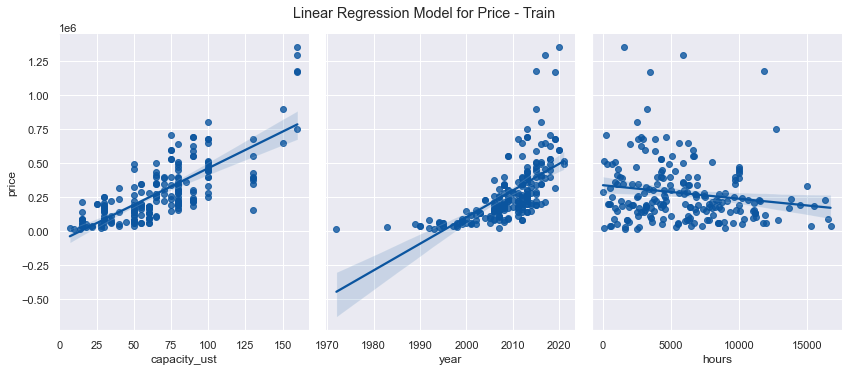

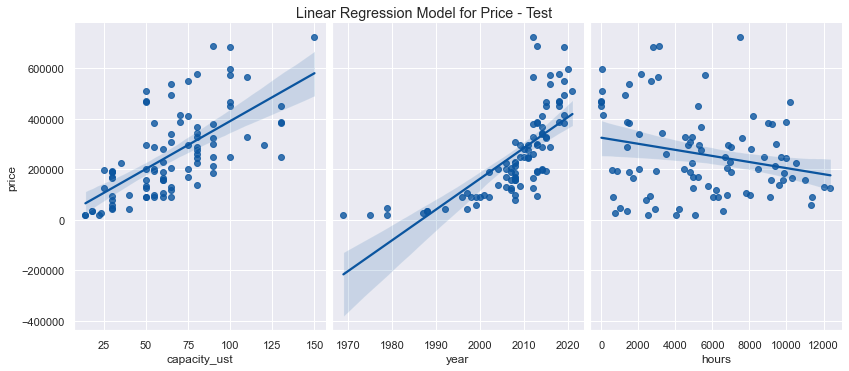

In [5958]:
# Regression Plot
sns.pairplot(train, x_vars=['capacity_ust', 'year', 'hours'], y_vars=['price'], height=5, aspect=.8, kind='reg').fig.suptitle('Linear Regression Model for Price - Train', y=1.02)
sns.pairplot(test, x_vars=['capacity_ust', 'year', 'hours'], y_vars=['price'], height=5, aspect=.8, kind='reg').fig.suptitle('Linear Regression Model for Price - Test', y=1.02)

In [5959]:
# KPI function
def kpi(Y_train, Y_train_pred, Y_test, Y_test_pred, name=''):
    kpi = pd.DataFrame(columns = ['MAE', 'RMSE', 'Bias'], index=['Train', 'Test'])
    kpi.index.name = name
    kpi.loc['Train', 'MAE'] = 100*np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
    kpi.loc['Train', 'RMSE'] = 100*np.sqrt(np.mean((Y_train - Y_train_pred)**2))/np.mean(Y_train)
    kpi.loc['Train', 'Bias'] = 100*np.mean((Y_train - Y_train_pred))/np.mean(Y_train)
    kpi.loc['Test', 'MAE'] = 100*np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)
    kpi.loc['Test', 'RMSE'] = 100*np.sqrt(np.mean((Y_test - Y_test_pred)**2))/np.mean(Y_test)
    kpi.loc['Test', 'Bias'] = 100*np.mean((Y_test - Y_test_pred))/np.mean(Y_test)
    kpi = kpi.astype(float).round(2)
    display(kpi)

In [5960]:
# price ~ capacity_ust

# Fit
ols_model = smf.ols('price ~ capacity_ust', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - price ~ capacity_ust (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     292.6
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.33e-41
Time:                        05:23:38   Log-Likelihood:                -2806.6
No. Observations:                 211   AIC:                             5617.
Df Residuals:                     209   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -7.54e+04    2.3e+04     -3.275   

,MAE,RMSE,Bias
Linear Regression Model - price ~ capacity_ust (%),,,
Train,39.54,51.83,0.00
Test,42.03,53.03,-6.22


In [5961]:
# price ~ year

# Fit
ols_model = smf.ols('price ~ year', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - price ~ year (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     141.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           2.75e-25
Time:                        05:23:38   Log-Likelihood:                -2844.4
No. Observations:                 211   AIC:                             5693.
Df Residuals:                     209   BIC:                             5699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.911e+07   3.31e+06    -11.821      0.0

,MAE,RMSE,Bias
Linear Regression Model - price ~ year (%),,,
Train,41.75,61.98,0.00
Test,38.22,53.82,-0.09


In [5962]:
# price ~ hours

# Fit
ols_model = smf.ols('price ~ hours', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - price ~ hours (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.062
Date:                Tue, 02 Aug 2022   Prob (F-statistic):             0.0146
Time:                        05:23:38   Log-Likelihood:                -2896.0
No. Observations:                 211   AIC:                             5796.
Df Residuals:                     209   BIC:                             5803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.377e+05   2.82e+04     11.962      0.0

,MAE,RMSE,Bias
Linear Regression Model - price ~ hours (%),,,
Train,56.56,79.16,0.00
Test,52.12,64.39,-9.11


In [5963]:
# price ~ capacity_ust + year + hours

# Fit
ols_model = smf.ols('price ~ capacity_ust + year + hours', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - all (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           3.77e-63
Time:                        05:23:38   Log-Likelihood:                -2750.1
No. Observations:                 211   AIC:                             5508.
Df Residuals:                     207   BIC:                             5522.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.644e+07   2.54e+06     -6.467   

,MAE,RMSE,Bias
Linear Regression Model - all (%),,,
Train,28.38,39.66,0.00
Test,32.63,42.34,-6.41


# Comparación de Regresión Lineal Simple vs GLM Inverse Gaussian Log y GLM Gamma Log

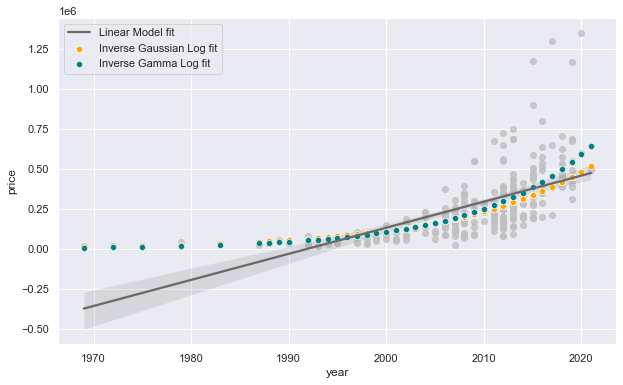

In [5964]:
# Price ~ year
from statsmodels.formula.api import glm
plt.figure(figsize=(10, 6))

# Inverse Gaussian - log
# Fit
glm_inversegauss_model = glm(formula = 'price ~ year', data=df_clean,
                         family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

# Gamma - log
# Fit
glm_gamma_model = glm(formula = 'price ~ year', data=df_clean,
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

df_clean['fit_price'] = glm_inversegauss_model.fittedvalues
df_clean['fit_price2'] = glm_gamma_model.fittedvalues
sns.regplot(x='year', y='price', data=df_clean, fit_reg=True, color='silver',
             line_kws={'color': 'dimgray', 'label': 'Linear Model fit'})
sns.scatterplot(x='year', y='fit_price', data=df_clean, color='orange', label='Inverse Gaussian Log fit')
sns.scatterplot(x='year', y='fit_price2', data=df_clean, color='teal', label='Inverse Gamma Log fit')
plt.show()

# Generalized Linear Models

- Because of the log link function, the coefficient indicates that a 1-unit increase
- in independent variable causes a factor of e^B increase in dependent variable.
- B is the coef in model summary

In [5965]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [5966]:
# Inverse Gaussian - log

# Fit
glm_inversegauss_model = glm(formula = 'price ~ capacity_ust + year + hours', data=train, family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

# Summary
print(glm_inversegauss_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = glm_inversegauss_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = glm_inversegauss_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Inverse Gaussian log - all (%)')

# AIC
print('AIC: ', glm_inversegauss_model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  211
Model:                            GLM   Df Residuals:                      207
Model Family:         InverseGaussian   Df Model:                            3
Link Function:                    log   Scale:                      6.5586e-07
Method:                          IRLS   Log-Likelihood:                -2689.0
Date:                Tue, 02 Aug 2022   Deviance:                   0.00016819
Time:                        05:23:39   Pearson chi2:                 0.000136
No. Iterations:                    18   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -92.9170      4.792    -19.389   

,MAE,RMSE,Bias
Inverse Gaussian log - all (%),,,
Train,26.49,49.69,-5.75
Test,28.60,48.64,-9.24


AIC:  5386.046146025545


In [5967]:
# Gamma - log

# Fit
glm_gamma_model = glm(formula = 'price ~ capacity_ust + year + hours', data=train, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Summary
print(glm_gamma_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = glm_gamma_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = glm_gamma_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Gamma log - all (%)')

# AIC
print('AIC: ', glm_gamma_model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  211
Model:                            GLM   Df Residuals:                      207
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                        0.082494
Method:                          IRLS   Log-Likelihood:                -2617.0
Date:                Tue, 02 Aug 2022   Deviance:                       17.422
Time:                        05:23:39   Pearson chi2:                     17.1
No. Iterations:                    14   Pseudo R-squ. (CS):             0.9987
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -116.6181      6.530    -17.858   

,MAE,RMSE,Bias
Gamma log - all (%),,,
Train,21.09,33.56,-1.40
Test,23.25,37.00,-6.69


AIC:  5242.022103719784


# Diagnostics

# Residuals vs. fitted 
- Línea azul = lowess

Para comprobar si el modelo predictivo es el apropiado, en el gráfico debe cumplirse que:
- Los residuales siguen una distribución normal con media cero
- La línea de tendencia azul debe seguir de cerca la línea central de valor 0
- En la escala Y, los valores extremos positivos y negativos deben tener similar magnitud


# Q-Q Plot
- En el eje X, son los cuantiles de una distribución normal teórica
- En el eje Y, son los cuantiles de de los residuales
- Línea roja = normality line

Para comprobar si el modelo predictivo es el apropiado, en el gráfico debe cumplirse que:
- Los residuales siguen una distribución normal
- Los puntos deben seguir la tendencia y estar lo más cercano posible a la línea roja


# Scale-location Plot
- Muestra la raíz cuadrada de los residuales estandarizados frente a los valores ajustados.
- Muestra si el tamaño de los residuales aumentan o disminuyen a lo largo de los valores ajustados

Para comprobar si el modelo predictivo es el apropiado, en el gráfico debe cumplirse que:
- La línea de tendencia azul no debe tener una pendiente positiva o negativa muy pronunciada
- La línea de tendenca azul no debe subir ni bajar significativamente
- La escala del eje Y no debe tener un amplio rango



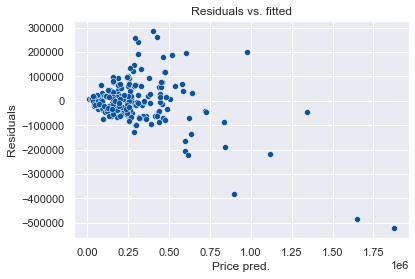

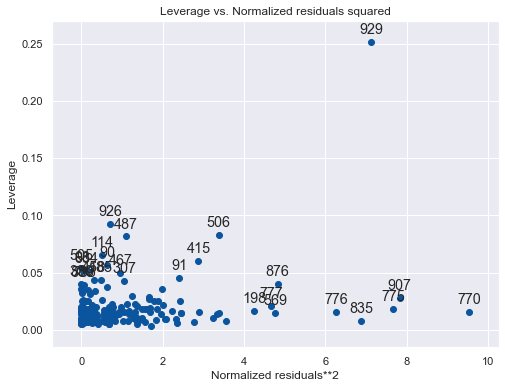

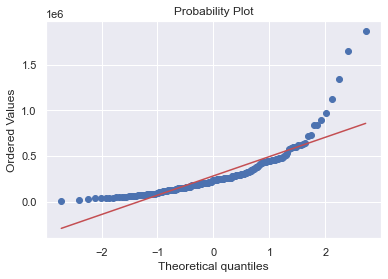

In [5968]:
# Residuals vs. fitted plot
residuals = Y_train - Y_train_pred
sns.scatterplot(x=Y_train_pred, y=residuals)
plt.title('Residuals vs. fitted')
plt.xlabel('Price pred.')
plt.ylabel('Residuals')
plt.show()

# Leverage plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(glm_gamma_model, ax=ax)
plt.show()

# Q-Q plot
stats.probplot(Y_train_pred, dist="norm", plot=pylab)
pylab.show()

In [5969]:
# Predict new data

# Define your values
my_values = [
            {'capacity_ust': 80, 'year': 2013, 'hours': 5000}, # 161569
            {'capacity_ust': 80, 'year': 2015, 'hours': 5136}, # 161909
            {'capacity_ust': 50, 'year': 2012, 'hours': 8740}, # 160843
            {'capacity_ust': 80, 'year': 2013, 'hours': 10433}, # 161337
            {'capacity_ust': 130, 'year': 2004, 'hours': 700}, # 223865
            {'capacity_ust': 130, 'year': 2004, 'hours': 40}, # 223969
            {'capacity_ust': 30, 'year': 2011, 'hours': 1364}, # 160363
            {'capacity_ust': 80, 'year': 2012, 'hours': 4618}, # 160636
            {'capacity_ust': 80, 'year': 2006, 'hours': 617}, # 13923
            {'capacity_ust': 99, 'year': 1994, 'hours': 24362}, # 79210
            {'capacity_ust': 99, 'year': 1993, 'hours': 25863}, # 77901
            {'capacity_ust': 80, 'year': 2006, 'hours': 617}, # 13923
            {'capacity_ust': 110, 'year': 2000, 'hours': 9729}, # 58231
            {'capacity_ust': 45, 'year': 2011, 'hours': 4379}, # 160364
            {'capacity_ust': 130, 'year': 2012, 'hours': 2828}, # 160536
            {'capacity_ust': 45, 'year': 2011, 'hours': 2036}, # 160376
            {'capacity_ust': 80, 'year': 2014, 'hours': 1940}, # 161319
            {'capacity_ust': 130, 'year': 2008, 'hours': 8468}, # 229007
]

newdata = pd.DataFrame(columns=['capacity_ust',
                            'year',
                            'hours'])

for i in range(0, len(my_values)):
    currentItem = my_values[i]
    newdata.loc[i] = [my_values[i]['capacity_ust'],
                        my_values[i]['year'],
                        my_values[i]['hours']]
newdata

# Predict your values with the best model
y_test_pred = glm_gamma_model.predict(newdata)
price_predict = pd.DataFrame(y_test_pred)

# Define +/- 20% of price predict
price_min = price_predict*0.80 
price_max = price_predict*1.20

# Report price pred. in a DataFrame
report = pd.concat([newdata, price_predict, price_min, price_max], axis=1)
report.columns.values[3] = 'price_predict'
report.columns.values[4] = 'price_min'
report.columns.values[5] = 'price_max'
report['price_predict'] = report['price_predict'].round(decimals=2)
report['price_min'] = report['price_min'].round(decimals=2)
report['price_max'] = report['price_max'].round(decimals=2)
report

,capacity_ust,year,hours,price_predict,price_min,price_max
0,80,2013,5000,345057.98,276046.38,414069.57
1,80,2015,5136,390276.25,312221.00,468331.50
2,50,2012,8740,187354.03,149883.23,224824.84
3,80,2013,10433,289125.70,231300.56,346950.84
4,130,2004,700,454075.84,363260.67,544891.01
5,130,2004,40,463936.67,371149.33,556724.00
6,30,2011,1364,168318.16,134654.53,201981.79
7,80,2012,4618,327786.46,262229.17,393343.75
8,80,2006,617,254650.46,203720.37,305580.56
9,99,1994,24362,71581.09,57264.88,85897.31
